# Exploring NLP with a SPAM filter classifier using SVM

We are going to build a machine learneing model that can identify whether or not an email is spam, so this is a binary classification problem. I am going to use the Python library Scikit-Learn to explore tokenization, vectorization, and statistical classification algorithms. Let's begin by importing the necessary dependencies such as CountVectorizer, SVM, and a couple of metrics.

**Importing dependencies**

In [18]:
import pandas as pd 
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.metrics import classification_report, accuracy_score

**Loading the data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/spam.csv")

In [3]:
#Looking at the first rows

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In this example, we have decided to convert our target variable into numbers right away. Spam will become 1 and ham will become 0.

In [4]:
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [5]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Cleaning Process**

We already learned how to clean the data, so we will start by counting spam and not spam emails, and also eliminating duplicates. 

In [6]:
# EDA: Establish some baseline counts and eliminate duplicate rows.

print("spam count: " +str(len(df.loc[df.Category==1])))
print("not spam count: " +str(len(df.loc[df.Category==0])))
print(df.shape)
df['Category'] = df['Category'].astype(int)



spam count: 747
not spam count: 4825
(5572, 2)


In [7]:
df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['Message','Category']]
df.shape

(5157, 2)

Observations: We have dropped 415 duplicated rows.

Using regular expressions let's convert all words to lower case, clean the data from punctuation marks and special characters.

In [12]:
clean_desc = []

for w in range(len(df.Message)):
    desc = df['Message'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)

#assign the cleaned descriptions to the data frame
df['Message'] = clean_desc
        
df.head(3)

,Message,Category
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final ...,1


Let's build a stop words list from scratch and then visualize our wordcloud.

In [13]:
# Building a stop words list from scratch

stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 
're', 'new', 'subject']

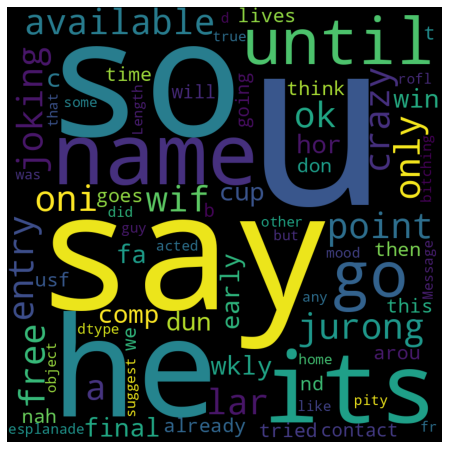

In [16]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['Message']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now that the Messages have been cleaned, to prevent the word cloud from outputting sentences, the messages go through a process called tokenization. It is the process of breaking down a sentence into the individual words. The individual words are called tokens.

**Vectorizing**

Using SciKit-Learn’s CountVectorizer(), it is easy to transform the body of text into a sparse matrix of numbers that the computer can pass to machine learning algorithms. We are going to create the sparse matrix, then split the data using sk-learn train_test_split().

In [17]:
#Create sparse matrix

message_vectorizer = CountVectorizer().fit_transform(df['Message'])

# Split the data

X_train, X_test, y_train, y_test = train_test_split(message_vectorizer, df['Category'], test_size = 0.45, random_state = 42, shuffle = True)

**The classifier algorithm**

In this example we will practice using **Support Vector Machine** but feel free to try addtional classifiers.

In [19]:
classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

Now let's generate some predictions

In [20]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2024
           1       0.96      0.89      0.92       297

    accuracy                           0.98      2321
   macro avg       0.97      0.94      0.96      2321
weighted avg       0.98      0.98      0.98      2321



In [21]:
# Use accuracy_score function to get the accuracy

print("SVM Accuracy Score -> ",accuracy_score(predictions, y_test)*100)

SVM Accuracy Score ->  98.10426540284361


Our model achieved 98% accuracy!

Source: 

https://towardsdatascience.com/3-super-simple-projects-to-learn-natural-language-processing-using-python-8ef74c757cd9

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

https://medium.com/analytics-vidhya/how-to-build-a-simple-sms-spam-filter-with-python-ee777240fc